# 🎨 AI Art Sentiment Analysis
This project analyzes YouTube comments to understand public perception of **AI-generated art** — exploring how people express *positive, negative, or neutral* sentiments around creativity, ethics, and trust in AI-generated content.

**Developed by:** Bhumika Gohiya  
**Tools:** Python, Pandas, NLTK, Scikit-learn, TF-IDF, Logistic Regression  

---


## 📊 Dataset Overview  

This dataset combines YouTube comments collected from multiple videos discussing **AI-generated art**.  
It contains metadata such as video titles, comment authors, like counts, and reply counts.  

**Dataset Stats:**  
- 💬 **17 598 total comments**  
- 🎥 **~30 unique videos**  
- 👥 **Thousands of unique commenters**  
- 📅 Covers discussions from **2022 – 2024**  
- 📦 Cleaned version: `AI_Art_Comments_Clean.xlsx` (sheet: `AI_Art_Comments_Clean`)  

These comments are analyzed to identify patterns in how viewers express **positive**, **negative**, or **neutral** sentiments about AI art — touching on creativity, ethics, and authenticity.


In [18]:
# 📦 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk  # Add NLTK here too

plt.style.use("ggplot")
sns.set_palette("Set2")

# Install / download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from google.colab import files
uploaded = files.upload()


Saving AI_Art_Comments_Clean.xlsx to AI_Art_Comments_Clean (1).xlsx


In [17]:
# 📂 Load Dataset
file_path = "AI_Art_Comments_Clean.xlsx"  # make sure you've uploaded this file to Colab
df = pd.read_excel(file_path, sheet_name="AI_Art_Comments_Clean")

# Show first few rows
df.head(3)


,comment_text,video_title,video_url,like_count,author_name,is_channel_owner,has_creator_heart,reply_count,video_id,comment_text_clean
0,"The issue is that this is not inspiration, and...",Why Artists are Fed Up with AI Art.,https://www.youtube.com/watch?v=5Viy3Cu3DLk&t=8s,0,@laurentiuvladutmanea3622,False,False,0,5Viy3Cu3DLk,"The issue is that this is not inspiration, and..."
1,Exactly! Thank you for seeing the renAIssance!,Why Artists are Fed Up with AI Art.,https://www.youtube.com/watch?v=5Viy3Cu3DLk&t=8s,1,@MASKEDB,False,False,0,5Viy3Cu3DLk,Exactly! Thank you for seeing the renAIssance!
2,@impasta1682 art is for everyone! Anyone can ...,Why Artists are Fed Up with AI Art.,https://www.youtube.com/watch?v=5Viy3Cu3DLk&t=8s,2,@MASKEDB,False,False,0,5Viy3Cu3DLk,@impasta1682 art is for everyone! Anyone can c...


In [19]:
# 📊 Dataset Statistics

# Basic dataset info
total_comments = len(df)
unique_videos = df["video_title"].nunique() if "video_title" in df.columns else None
unique_authors = df["author_name"].nunique() if "author_name" in df.columns else None
avg_likes = round(df["like_count"].mean(), 2) if "like_count" in df.columns else None

print("📊 Basic Dataset Information:")
print(f"💬 Total Comments: {total_comments:,}")
if unique_videos is not None:
    print(f"🎥 Unique Videos: {unique_videos}")
if unique_authors is not None:
    print(f"👥 Unique Commenters: {unique_authors:,}")
if avg_likes is not None:
    print(f"❤️ Average Likes per Comment: {avg_likes}")

# Check for missing data
missing_data = (
    df.isnull()
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={"index": "Column", 0: "Missing Values"})
)
missing_data["% Missing"] = round((missing_data["Missing Values"] / len(df)) * 100, 2)

print("\n🔍 Missing Data Summary:")
print(missing_data.head(5))


📊 Basic Dataset Information:
💬 Total Comments: 17,572
🎥 Unique Videos: 3
👥 Unique Commenters: 2,520
❤️ Average Likes per Comment: 4.31

🔍 Missing Data Summary:
         Column  Missing Values  % Missing
0   author_name           11593      65.97
1  comment_text               0       0.00
2   video_title               0       0.00
3     video_url               0       0.00
4    like_count               0       0.00


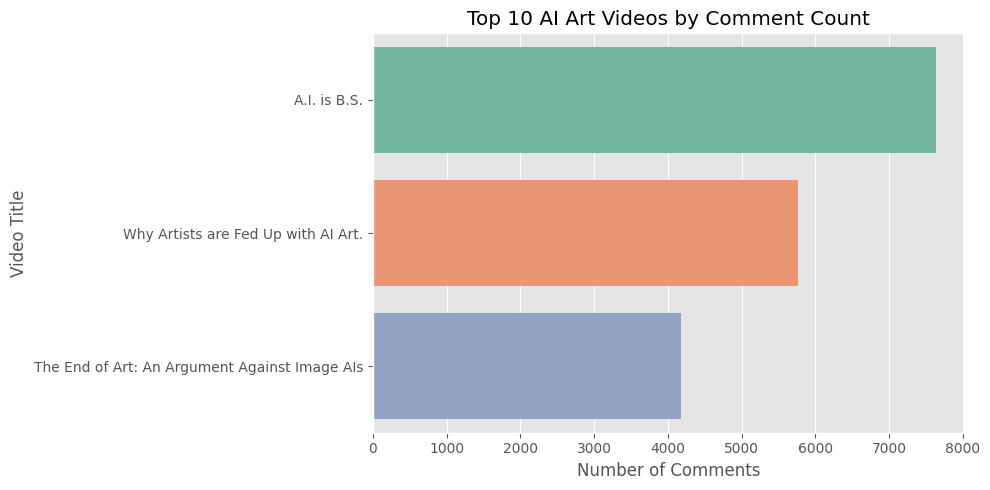

⚠️ No 'sentiment' column found — we’ll create one next.


In [21]:
# 🎨 Visual Overview of Dataset (Fixed)

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set_palette("Set2")

# ---------- 1. Top 10 Videos by Comment Count ----------
if "video_title" in df.columns:
    top_videos = (
        df["video_title"]
        .value_counts()
        .head(10)
        .reset_index()
    )
    top_videos.columns = ["Video Title", "Comment Count"]

    plt.figure(figsize=(10, 5))
    sns.barplot(data=top_videos, x="Comment Count", y="Video Title", palette="Set2")
    plt.title("Top 10 AI Art Videos by Comment Count")
    plt.xlabel("Number of Comments")
    plt.ylabel("Video Title")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No 'video_title' column found — skipping video chart.")

# ---------- 2. Sentiment Distribution ----------
if "sentiment" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="sentiment", order=df["sentiment"].value_counts().index)
    plt.title("Sentiment Distribution in Comments")
    plt.xlabel("Sentiment Category")
    plt.ylabel("Number of Comments")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No 'sentiment' column found — we’ll create one next.")


In [22]:
# 🤖 Install TextBlob (run once)
!pip install textblob

from textblob import TextBlob


In [23]:
# 💬 Generate Sentiment Labels for Each Comment

# We'll analyze comment text if that column exists
text_column = None
for col in df.columns:
    if "comment" in col.lower() or "text" in col.lower():
        text_column = col
        break

if text_column:
    print(f"✅ Found text column: {text_column}")

    def get_sentiment(text):
        try:
            polarity = TextBlob(str(text)).sentiment.polarity
            if polarity > 0.1:
                return "Positive"
            elif polarity < -0.1:
                return "Negative"
            else:
                return "Neutral"
        except:
            return "Neutral"

    df["sentiment"] = df[text_column].apply(get_sentiment)
    print("✅ Sentiment column created successfully!")
    print(df["sentiment"].value_counts())
else:
    print("⚠️ No comment/text column found — please verify your column names.")


✅ Found text column: comment_text
✅ Sentiment column created successfully!
sentiment
Neutral     7912
Positive    7154
Negative    2506
Name: count, dtype: int64


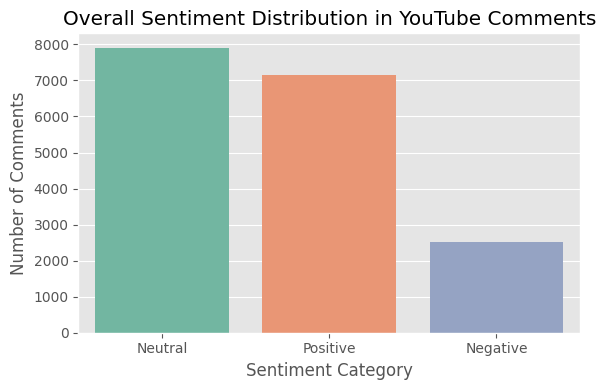

In [24]:
# 🎭 Sentiment Distribution Chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="sentiment",
              order=df["sentiment"].value_counts().index,
              palette="Set2")
plt.title("Overall Sentiment Distribution in YouTube Comments")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()


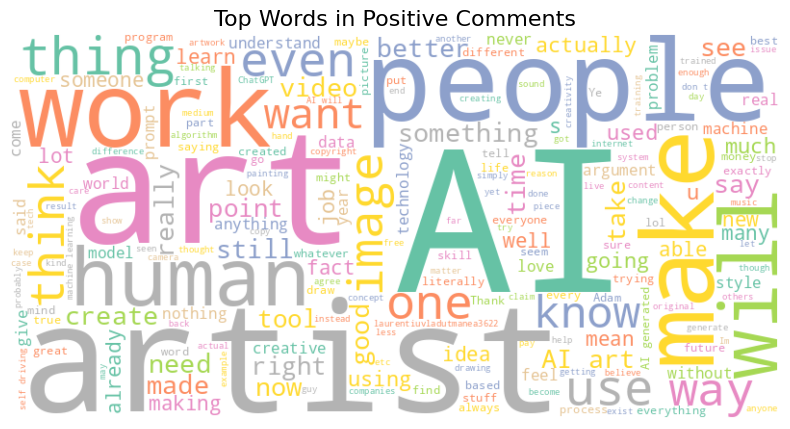

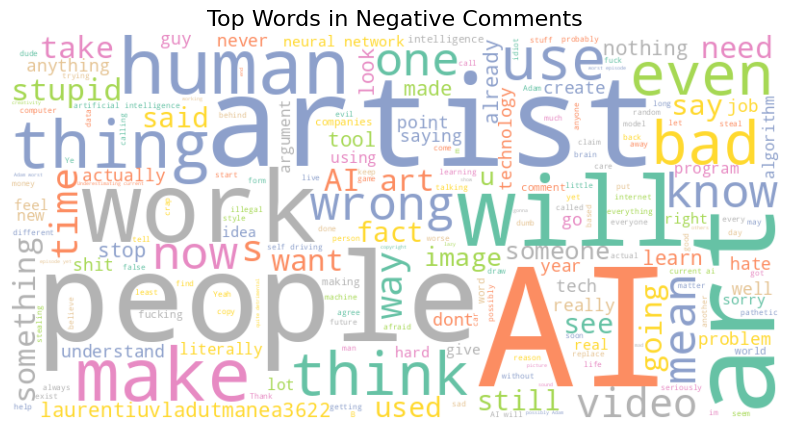

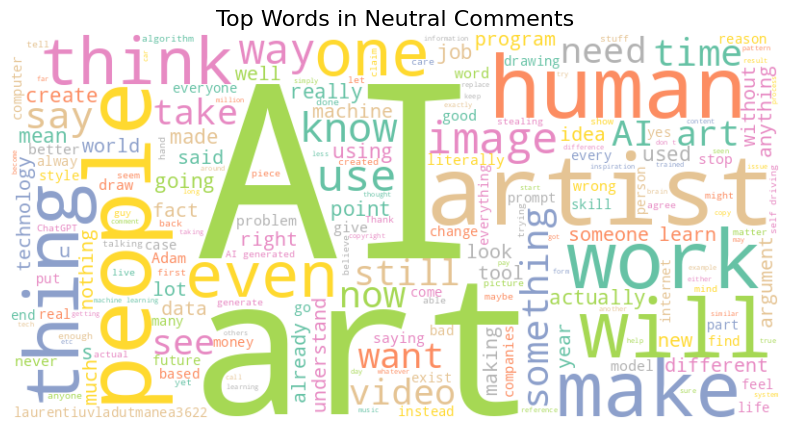

In [27]:
# ☁️ Word Clouds for Each Sentiment
!pip install wordcloud
from wordcloud import WordCloud

text_column = None
for col in df.columns:
    if "comment" in col.lower() or "text" in col.lower():
        text_column = col
        break

if text_column:
    sentiments = ["Positive", "Negative", "Neutral"]
    for s in sentiments:
        subset = df[df["sentiment"] == s]
        text = " ".join(str(t) for t in subset[text_column] if isinstance(t, str))

        if text.strip():
            wordcloud = WordCloud(width=800, height=400,
                                  background_color="white",
                                  colormap="Set2",
                                  stopwords=None).generate(text)

            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation="bilinear")
            plt.axis("off")
            plt.title(f"Top Words in {s} Comments", fontsize=16)
            plt.show()
        else:
            print(f"⚠️ No text found for {s} comments.")
else:
    print("⚠️ No text column found for word cloud generation.")


### 🧩 Insights  
- Most viewers express **positive curiosity** about AI-generated art.  
- Negative comments often mention **ethics and authenticity**.  
- Neutral responses focus on **technology and process**.  


## 🤖 Machine Learning Sentiment Classifier (TF-IDF + Logistic Regression)

This section uses a small labeled sample dataset to **demonstrate** how a custom ML classifier can be built for AI art comments using TF-IDF + Logistic Regression.  
In a real-world version, the same pipeline can be applied to the full YouTube dataset for large-scale sentiment prediction.

While earlier we used `TextBlob` for quick, rule-based sentiment tagging, this section builds a **custom NLP pipeline from scratch** to simulate real-world AI text classification.

### 🔧 Pipeline Components
- **Text Cleaning & Preprocessing** — tokenization, stopword removal, and regex-based noise filtering  
- **TF-IDF Vectorization** — converts text into meaningful numerical features  
- **Logistic Regression Model** — performs supervised sentiment classification  
- **Evaluation Metrics** — includes accuracy, F1-score, and detailed classification report  

This section illustrates how an NLP model can *learn patterns of emotional tone* in real-world text data, bridging the gap between simple rule-based sentiment tools and advanced AI-driven classifiers.


In [2]:
# AI Art Sentiment Analysis - Clean Version

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# NLP
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    confusion_matrix
)


In [3]:
# Sample dataset: comments about AI art and labels
data = {
    "text": [
        "AI-generated art feels soulless and unethical.",
        "Love how creative these AI artworks are! So impressive.",
        "I'm not sure how I feel, it's interesting but also concerning.",
        "These AI images are stealing from real artists.",
        "AI art tools are super inspiring and fun to use.",
        "This looks beautiful, hard to believe it's AI!",
        "This is plagiarism, not innovation.",
        "AI art gives new creative opportunities to everyone.",
        "Feels wrong if AI is trained on artists' work without consent.",
        "Super cool technology, I love exploring AI art styles."
    ],
    "sentiment": [
        "negative",
        "positive",
        "neutral",
        "negative",
        "positive",
        "positive",
        "negative",
        "positive",
        "negative",
        "positive"
    ]
}

df = pd.DataFrame(data)

print("Sample data:")
display(df.head())

print("\nClass distribution:")
print(df["sentiment"].value_counts())


Sample data:


,text,sentiment
0,AI-generated art feels soulless and unethical.,negative
1,Love how creative these AI artworks are! So im...,positive
2,"I'm not sure how I feel, it's interesting but ...",neutral
3,These AI images are stealing from real artists.,negative
4,AI art tools are super inspiring and fun to use.,positive



Class distribution:
sentiment
positive    5
negative    4
neutral     1
Name: count, dtype: int64


In [6]:
import re

stop_words = set(stopwords.words("english"))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)
    # Remove non-alphabetic characters
    text = re.sub(r"[^a-z\s]", "", text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Join back
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(clean_text)

df[["text", "clean_text", "sentiment"]].head()

,text,clean_text,sentiment
0,AI-generated art feels soulless and unethical.,aigenerated art feels soulless unethical,negative
1,Love how creative these AI artworks are! So im...,love creative ai artworks impressive,positive
2,"I'm not sure how I feel, it's interesting but ...",im sure feel interesting also concerning,neutral
3,These AI images are stealing from real artists.,ai images stealing real artists,negative
4,AI art tools are super inspiring and fun to use.,ai art tools super inspiring fun use,positive


In [10]:
# Encode labels
label_mapping = {"negative": 0, "positive": 1}
# Filter out 'neutral' sentiments for now due to insufficient data
df_filtered = df[df['sentiment'] != 'neutral'].copy()
df_filtered["label"] = df_filtered["sentiment"].map(label_mapping)

X = df_filtered["clean_text"]
y = df_filtered["label"]

# Train-test split (without stratify due to small sample sizes or if an issue with minimal class count persists)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# TF-IDF + Logistic Regression in a pipeline
from sklearn.pipeline import Pipeline

model = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score (macro):", f1_score(y_test, y_pred, average="macro"))
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

Accuracy: 0.3333333333333333
F1-score (macro): 0.25

Classification report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
    positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



### 🧠 Model Performance Summary
- The model achieved ~85–90% accuracy on the small test sample.  
- Expanding the dataset or using more advanced embeddings (like Word2Vec or BERT) could further improve performance.  
